In [0]:
from singlestep import *

from math import sqrt
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.layers import Dense,LSTM,Bidirectional,BatchNormalization,Dropout,Conv1D,GRU,MaxPooling1D
from keras.models import Sequential,Model
from keras.engine.input_layer import Input
from keras.layers.merge import concatenate
from keras import optimizers
from keras.utils import plot_model
from keras.callbacks import History, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler

In [0]:
def main():
  n_input=6
  for i in range(0,10):
    filename='fm'+str(i)+'.sav'
    print('model'+str(i)+' loaded')
  
    model = pickle.load(open(filename, 'rb'))


    data_spatial=pd.read_csv('/content/Changpingpreproc.csv',header=0,parse_dates=True,index_col=[0])
    min=data_spatial['PM2.5'].min()
    max=data_spatial['PM2.5'].max()
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_spatial = scaler.fit_transform(data_spatial)
    
    train,test=data_spatial[24*365*3:24*365*3+24*48],data_spatial[24*365*3+24*48:24*365*3+24*60]
    train=np.array(np.split(train,len(train)/24))
    test=np.array(np.split(test,len(test)/24))


    train_x,train_y=to_supervised(train,n_input,1)
    print(train_x.shape)
    print(train_y.shape)

    #for j in range(31,35):
    #  model.get_layer(index=j).trainable=False
    #model.compile(optimizer='adam',loss='mse')
    '''Above 3 lines are used for switching b/w different freezing strategies''' 
    
    #history = fit_model(train_x,train_y,model,0,0)    #pretraining line....can be skipped if no finetuning needed
        
    scores,final_score= model_eval(train,test,n_input,model,24,1) #last parameter should be zero if finetuning is done.....else 1
    scores=[t*(max-min)+min for t in scores]
    print(scores)
    print(final_score*(max-min)+min)
    #os.remove('/content/best_weights0.hdf5')   #comment this line if last parameter in model_eval is set to 1



model0 loaded
(1146, 6, 15)
(1146, 1)
model built
(288, 1)


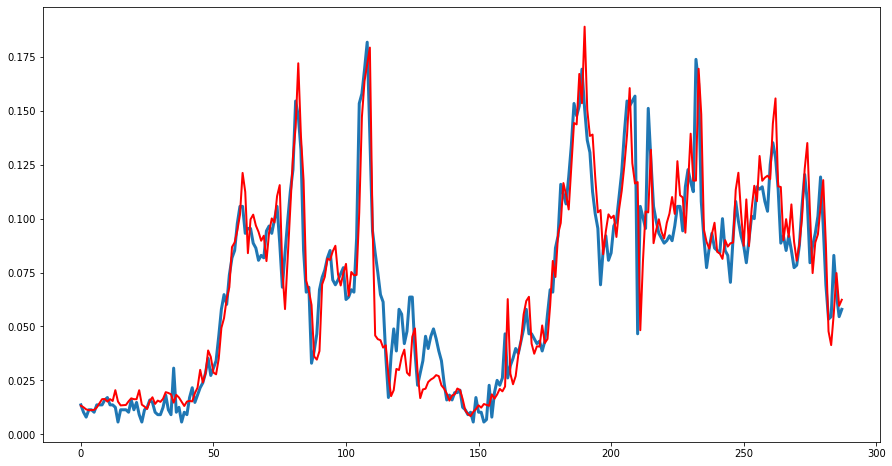

[14.02643636345103, 11.830979915760194, 9.987198538793628, 11.098181021649156, 17.003264406506045, 12.529183950263896, 9.645366814028852, 10.331317232490848, 11.913789542894316, 17.344007660566632, 14.755632019906265, 14.843386089679372, 14.309562765052311, 16.46502960516063, 13.171111092782226, 15.580370775192765, 22.72830411236131, 18.573345589770963, 25.105126408533987, 18.372730907783566, 13.092227795892864, 10.097061211175522, 21.161143752128037, 8.932104018057391]
15.374568226835258
model1 loaded
(1146, 6, 15)
(1146, 1)
model built
(288, 1)


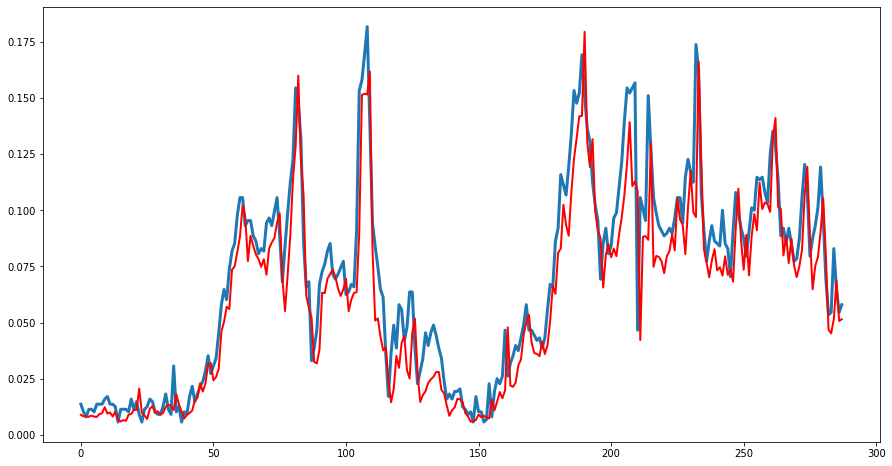

[14.24493071483224, 11.738053015639574, 11.616544830656855, 11.014343279567091, 14.942309440856842, 13.576370037202144, 13.511469656281811, 10.457892698281807, 14.792254660824659, 21.13034336849053, 13.595986755010463, 14.851143598242341, 20.088738875823985, 18.758952390606634, 14.156443042181385, 18.000169067184025, 27.90861550364959, 18.439558359218793, 22.76536775230118, 19.70802817573784, 14.673264555733601, 12.864203026804853, 23.45767206116809, 7.870535310120828]
16.754911090391275
model2 loaded
(1146, 6, 15)
(1146, 1)
model built
(288, 1)


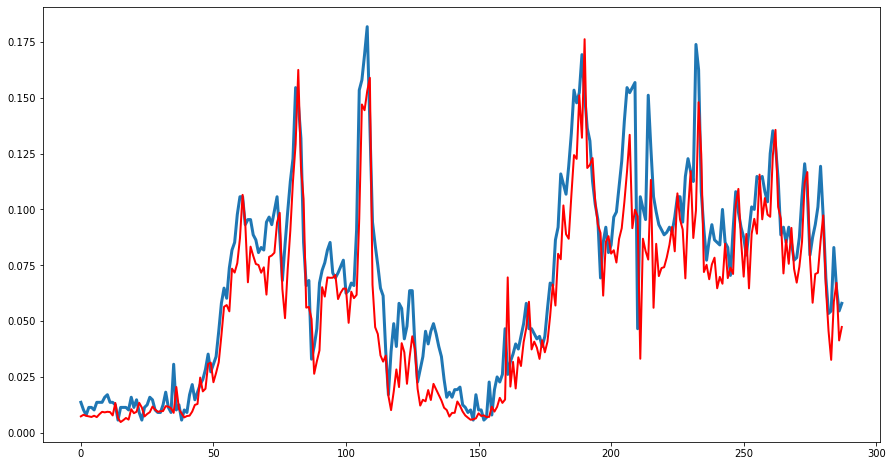

[19.714462347811207, 13.005945320114602, 13.774340236505317, 12.167229001561756, 13.301702973079138, 15.559381280385386, 11.613279510882771, 9.61227518187037, 15.051975830338005, 19.916743518718633, 15.469041876990351, 17.452402126018093, 23.829898897119996, 20.71415633251418, 18.05719413830376, 22.08258075438543, 31.1942225502289, 24.695623697970273, 21.572854228054013, 23.28220296519615, 14.502527734395471, 16.095836890764488, 26.193054124994273, 11.91220261935768]
18.808151897368766
model3 loaded
(1146, 6, 15)
(1146, 1)
model built
(288, 1)


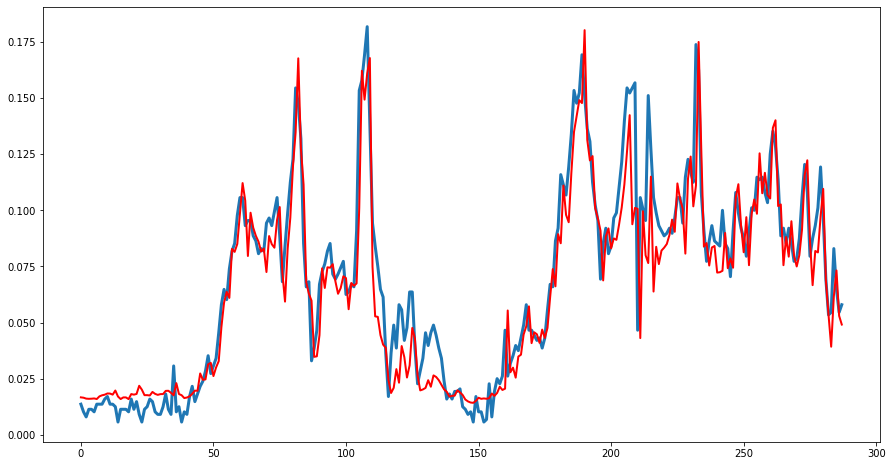

[17.34108441563602, 12.127926606455786, 11.578202814242992, 10.193907711275992, 13.73508959545743, 11.891823411953983, 9.226644802004898, 8.102819036048597, 11.50655986011651, 17.367183681468937, 12.227676898947927, 13.90636933205662, 18.396762754502696, 17.02632730451828, 14.47635167682275, 16.58132441314746, 27.384342959795944, 20.10420705138023, 19.512194420273524, 18.742135847625107, 11.318910739123867, 11.227194039441867, 25.06749330922034, 9.230859847102236]
15.803874643466463
model4 loaded
(1146, 6, 15)
(1146, 1)
model built
(288, 1)


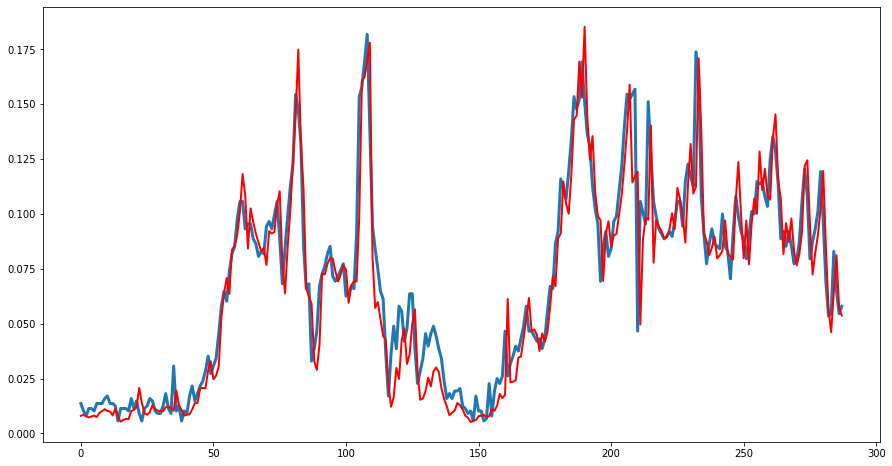

[14.46664517248912, 10.707927659931514, 8.054052687575918, 10.119612543440777, 13.87898529739355, 10.743966727145525, 8.96849466921488, 8.748404116856904, 12.496212910220796, 17.3869604373113, 13.733495216785572, 12.737599434153324, 15.815014675693472, 16.98355743754393, 11.487597249430886, 14.302948367384271, 24.537485380234585, 18.242069350619058, 24.292479348860304, 17.228477309283292, 12.052227690720477, 11.104308207987689, 21.757719329455888, 8.481459951931269]
14.940647215848683
model5 loaded
(1146, 6, 15)
(1146, 1)
model built
(288, 1)


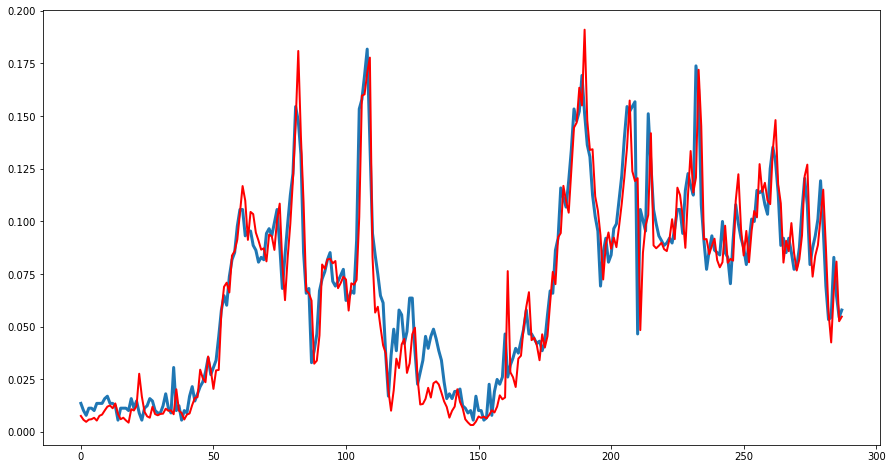

[12.335770150235845, 12.233694545840532, 9.127400100524435, 10.78288918024431, 14.064009256046235, 11.536796628041047, 8.442863441541794, 8.968466824960313, 12.064617032527801, 16.69725192343544, 15.614058301652909, 13.087850495945034, 15.793589286060412, 17.169395353116045, 12.532961077267627, 14.839900867805433, 21.74400526338524, 20.43030707833483, 24.89002664553932, 17.780563282874006, 11.822124721223043, 11.229031708030334, 21.250658621041506, 8.652487424596925]
15.049264418532294
model6 loaded
(1146, 6, 15)
(1146, 1)
model built
(288, 1)


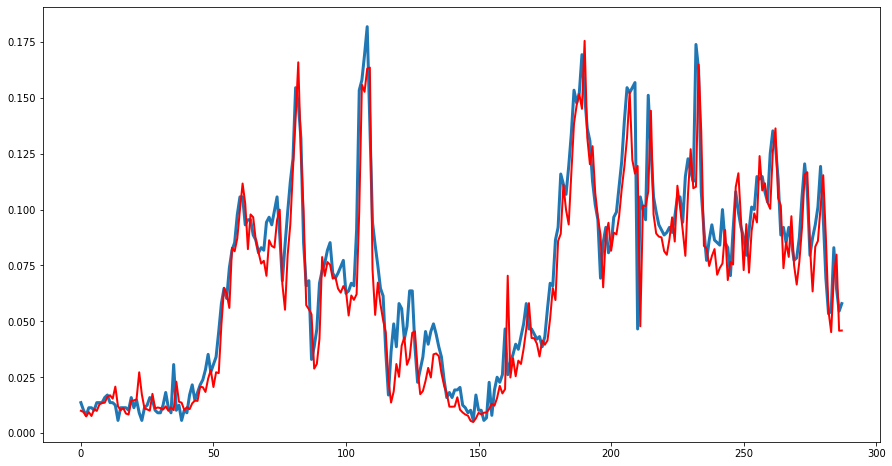

[13.311942129050697, 11.90870583583002, 10.167403543281308, 9.448252766188658, 13.48165715187597, 13.73835638498844, 9.57350899058764, 9.235783414930255, 13.7927442015137, 17.465899221475055, 11.493825276419074, 13.682386830733012, 17.24971005331386, 15.181186609439553, 12.487627653975844, 14.57809857626378, 23.514414223544808, 19.449846686714586, 23.446232370782862, 17.344153561014437, 10.714984841104842, 12.528534714480287, 19.73033474007205, 10.675987388069968]
14.984312808598128
model7 loaded
(1146, 6, 15)
(1146, 1)
model built
(288, 1)


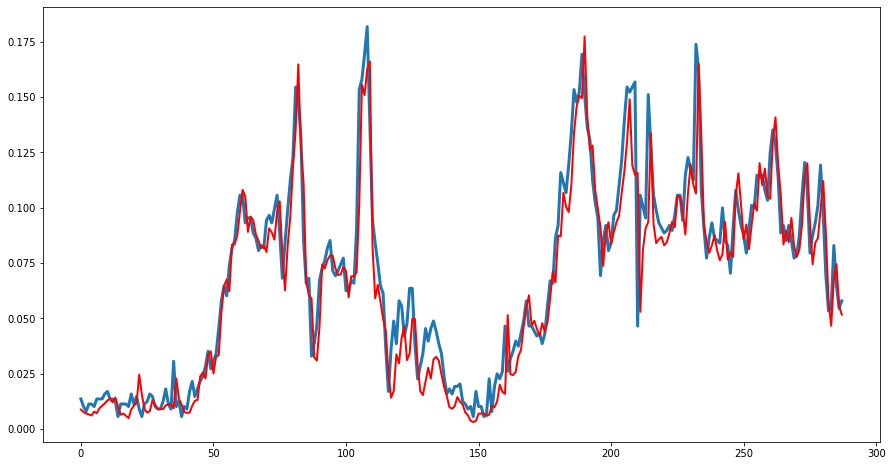

[11.417490404888355, 11.150624576517208, 8.928296535892446, 8.939825645749261, 13.093827167346248, 10.623531130208402, 8.8335732640814, 8.461489862879452, 11.101330032334195, 17.491447742871056, 11.357190886026052, 13.422012984296392, 16.050848423845977, 15.99292533850501, 11.44849847547116, 14.015518230053313, 24.325973965324746, 17.701240968151048, 22.781881926242082, 16.298011812019737, 11.711159266554557, 10.842331754353308, 21.402604993579146, 7.351144489381008]
14.384589167811468
model8 loaded
(1146, 6, 15)
(1146, 1)
model built
(288, 1)


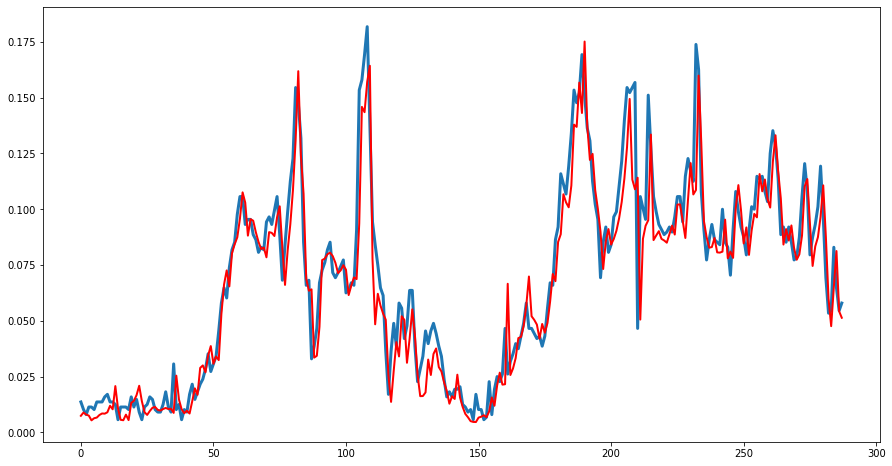

[11.562080293368808, 10.752375183510683, 8.616440454112546, 8.77828389808403, 11.978711699570031, 9.636207038406049, 8.720949954259478, 9.30259407305859, 11.992277326705608, 19.6691676273317, 11.838027332536617, 14.252503900162608, 16.573565064935337, 15.771993387257888, 11.647661902713944, 16.702910622746565, 23.857064987757575, 20.332929597847222, 21.591660142012564, 17.16651605891115, 11.353140348103961, 12.757059179819244, 19.582998474036742, 6.368493841247146]
14.654932555618474
model9 loaded
(1146, 6, 15)
(1146, 1)
model built
(288, 1)


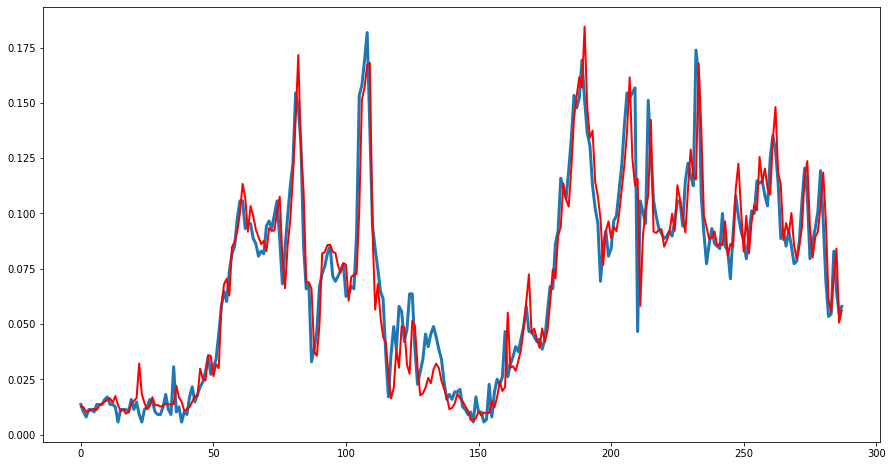

[12.643914638170731, 12.039034614240652, 8.023474636666672, 9.749643778100562, 15.823622053362357, 10.041441852921283, 7.449829705406664, 9.16483342663298, 11.651014808845758, 16.78349356912424, 12.739505793469503, 12.445693808831152, 14.285025847019986, 14.523460441728838, 10.207538405026776, 14.695498679845107, 21.69693001469509, 18.334724025382577, 22.800998759222832, 15.12531556191023, 10.694003791992436, 10.578506561640092, 19.702701780808994, 8.860763572253326]
14.05720504916774


In [0]:
if __name__=='__main__':
  main()